In [114]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


df = pd.read_csv(r'C:\Group-Adam\Portofolio project\Data Science Projects\Deep learning\Crime Data\Crime_Data_from_2020_to_Present.csv')
df = df[['Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME', 'Vict Age', 'Vict Sex', 'Vict Descent']]
df.head()

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Vict Age,Vict Sex,Vict Descent
0,01/08/2020 12:00:00 AM,01/08/2020 12:00:00 AM,2230,3,Southwest,36,F,B
1,01/02/2020 12:00:00 AM,01/01/2020 12:00:00 AM,330,1,Central,25,M,H
2,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,0,X,X
3,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,1730,15,N Hollywood,76,F,W
4,01/01/2020 12:00:00 AM,01/01/2020 12:00:00 AM,415,19,Mission,31,X,X


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650684 entries, 0 to 650683
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Date Rptd     650684 non-null  object
 1   DATE OCC      650684 non-null  object
 2   TIME OCC      650684 non-null  int64 
 3   AREA          650684 non-null  int64 
 4   AREA NAME     650684 non-null  object
 5   Vict Age      650684 non-null  int64 
 6   Vict Sex      572487 non-null  object
 7   Vict Descent  572481 non-null  object
dtypes: int64(3), object(5)
memory usage: 39.7+ MB


In [116]:
df.describe()


,TIME OCC,AREA,Vict Age
count,650684.000000,650684.000000,650684.000000
mean,1344.061993,9.059364,29.868654
std,652.393240,5.787480,21.461243
min,1.000000,1.000000,-12.000000
25%,900.000000,4.000000,14.000000
50%,1420.000000,8.000000,30.000000
75%,1900.000000,13.000000,45.000000
max,2359.000000,21.000000,99.000000


In [117]:
# cheak missing values
data.isnull().sum()

Date Rptd       0
DATE OCC        0
TIME OCC        0
AREA            0
AREA NAME       0
Vict Age        0
Vict Sex        0
Vict Descent    0
Year            0
Month           0
Day             0
Hour            0
Vict Age Cat    0
dtype: int64

In [ ]:
# I added "four new columns" for "year", "month", "day", and "hour".

# Furthermore, I have included a column for the 'victims' age group.

# I deleted this month's data because the 2023/6 data was insufficient.

In [123]:
#time_field = 'DATE OCC' #time when the crime occurred
time_field = 'Date Rptd' #time when the crime reported

df[time_field] = df[time_field].apply(lambda x: x.split()[0])
df['Year'] = df[time_field].apply(lambda x: int(x.split('/')[-1]))
df['Month'] = df[time_field].apply(lambda x: int(x.split('/')[0]))
df['Day'] = df[time_field].apply(lambda x: int(x.split('/')[1]))
df['Hour'] = df['TIME OCC'].apply(lambda x: x//100)

def GetAgeCategory(age):
    if age<=4: return 'Baby'
    if age<=12: return 'Child'
    elif age<=19: return 'Teen'
    elif age<=39: return 'Adult'
    elif age<=59: return 'Middle'
    else: return 'Senior'
    
df['Vict Age Cat'] = df['Vict Age'].apply(lambda x: GetAgeCategory(x))

df.drop(df[(df['Year']==2023) & (df['Month']==6)].index, inplace=True) # data in 2023/6 is incomplete and thus removed
df.tail(100)

,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Vict Age,Vict Sex,Vict Descent,Year,Month,Day,Hour,Vict Age Cat
650577,01/07/2023,01/06/2023 12:00:00 AM,800,10,West Valley,0,NaN,NaN,2023,1,7,8,Baby
650579,05/20/2023,05/19/2023 12:00:00 AM,2045,5,Harbor,36,M,H,2023,5,20,20,Adult
650580,10/30/2023,10/28/2023 12:00:00 AM,2100,3,Southwest,32,M,B,2023,10,30,21,Adult
650581,09/08/2023,09/06/2023 12:00:00 AM,2200,18,Southeast,0,NaN,NaN,2023,9,8,22,Baby
650582,07/05/2023,06/30/2023 12:00:00 AM,1530,13,Newton,57,M,H,2023,7,5,15,Middle
...,...,...,...,...,...,...,...,...,...,...,...,...,...
650679,03/22/2023,03/22/2023 12:00:00 AM,1000,16,Foothill,25,F,H,2023,3,22,10,Adult
650680,04/12/2023,04/12/2023 12:00:00 AM,1630,12,77th Street,29,M,B,2023,4,12,16,Adult
650681,07/02/2023,07/01/2023 12:00:00 AM,1,1,Central,24,F,H,2023,7,2,0,Adult
650682,03/05/2023,03/05/2023 12:00:00 AM,900,9,Van Nuys,53,F,H,2023,3,5,9,Middle


In [ ]:
# Basic Quantity Analysis

In [ ]:
# First, let's look into the number of crime incidents with respect to areas, ages, descents, and genders. Observations are summarized:

  # 1. The top 5 areas are area 1 (Central), 12 (77th Street), 14 (Pacific), 3 (Southwest), and 6 (Hollywood). Check the geographic areas here.
  # 2. The number of crime incidents against babies (0-4) is the third highest. (Note that the age was recorded by 0 for the crime indicents with missing descent. Thus, here I remove these records to avoid misleading result of the Baby category.)
  # 3. The top 5 descents are H (Hispanic/Latin/Mexican), W (White), B (Black), X (Unknown), O (Other).
  # 4. The numbers of crime incidents against male and female are not very different.

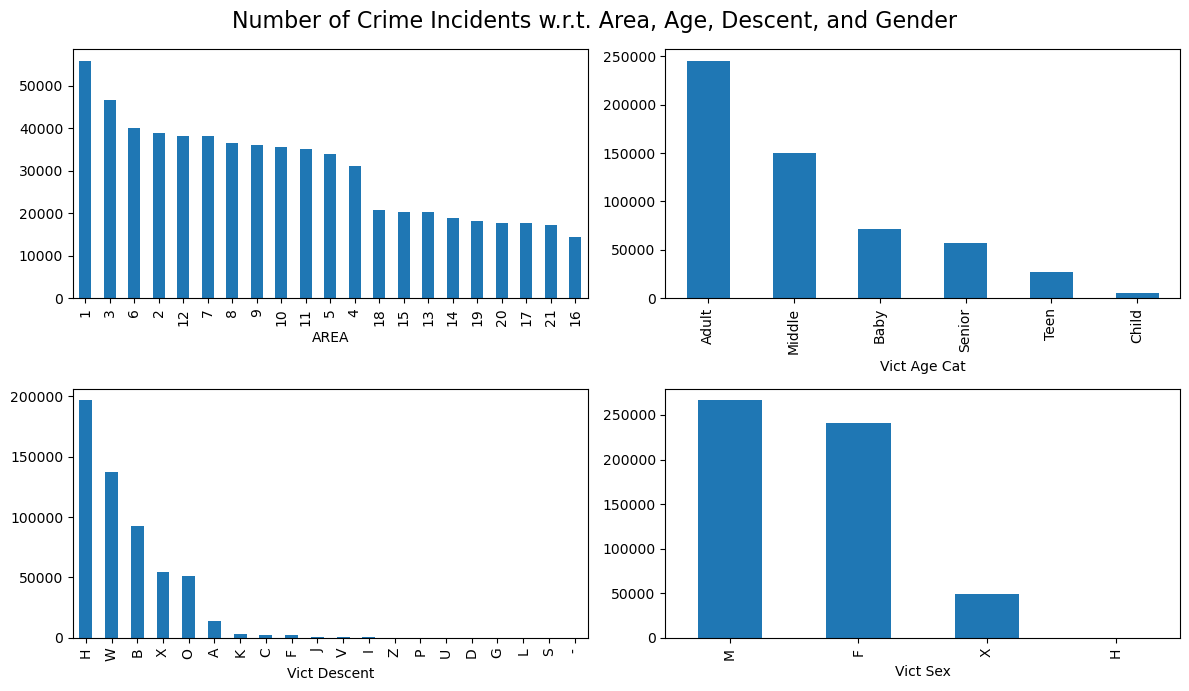

In [125]:
#plt.figure(figsize=(10, 10))
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))

df.groupby(['AREA'])['Day'].count().sort_values(ascending=False).plot(kind='bar', ax=axes[0,0])

df[df['Vict Descent'].notnull()].groupby(['Vict Age Cat'])['Day'].count().sort_values(ascending=False).plot(kind='bar', ax=axes[0,1])

df.groupby(['Vict Descent'])['Day'].count().sort_values(ascending=False).plot(kind='bar', ax=axes[1,0])

df.groupby(['Vict Sex'])['Day'].count().sort_values(ascending=False).plot(kind='bar', ax=axes[1,1])

fig.suptitle('Number of Crime Incidents w.r.t. Area, Age, Descent, and Gender', fontsize=16)

plt.tight_layout()

In [ ]:
# Investigating 'Time':
  # Looking into the number of crime incidents since 2000 to now, the number increases from about 16000 cases per month to about 19000 now.

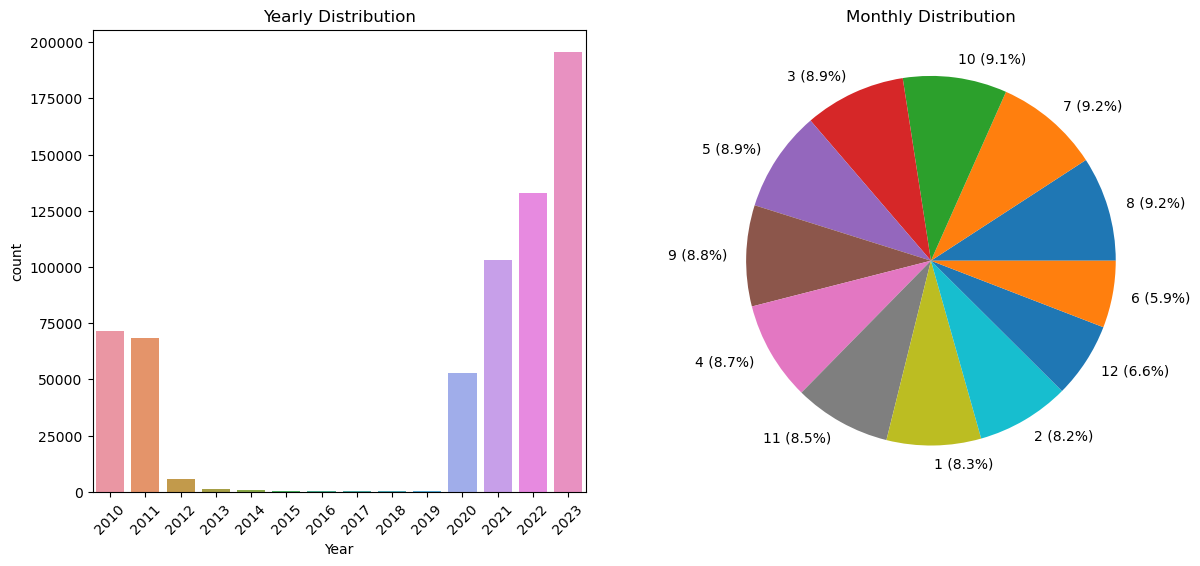

In [126]:
fig, ax = plt.subplots(1, 2, figsize = (14, 6))
sns.countplot(data=df, x='Year', ax=ax[0])


# Countplot for Year 
sns.countplot(data=df, x='Year', ax=ax[0])
ax[0].set_title('Yearly Distribution')
ax[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability


# Pie chart for Month
month_counts = df['Month'].value_counts()
percentage_labels = [f"{month} ({percentage:.1f}%)"
                     for month, percentage in zip(month_counts.index, month_counts / month_counts.sum() * 100)]

df['Month'].value_counts().plot.pie(ax=ax[1], autopct='', labels=percentage_labels)
ax[1].set_title('Monthly Distribution')

# Remove default labels inside the pie chart
ax[1].set_ylabel('')


plt.show()

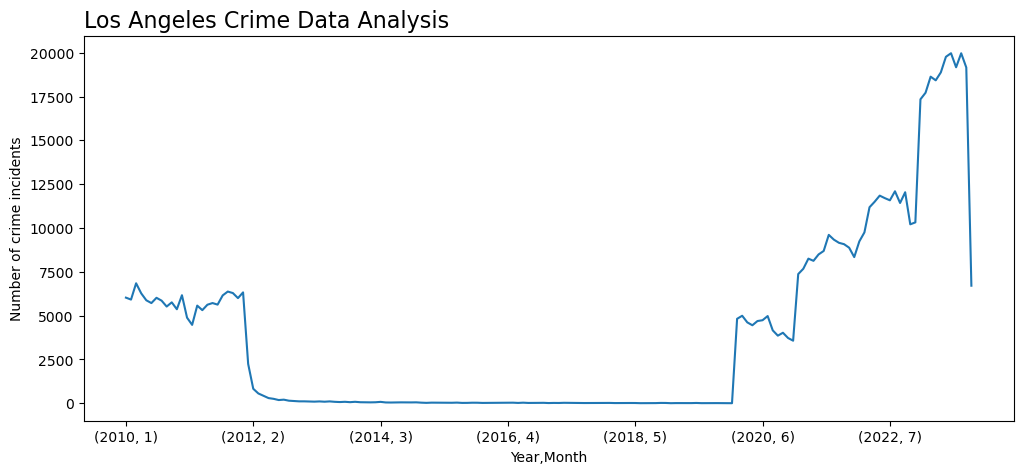

In [127]:
df.groupby(['Year', 'Month'])['Day'].count().plot(kind='line', figsize=(12, 5))
plt.ylabel('Number of crime incidents')
plt.title('Los Angeles Crime Data Analysis', loc='left', fontsize=16)
plt.show()


In [ ]:
# Is there an increase in the amount of criminal incidences this month? >>>> Looks like no.

<Axes: title={'center': 'Number of Crime Incidents over 12 Months'}, xlabel='Month'>

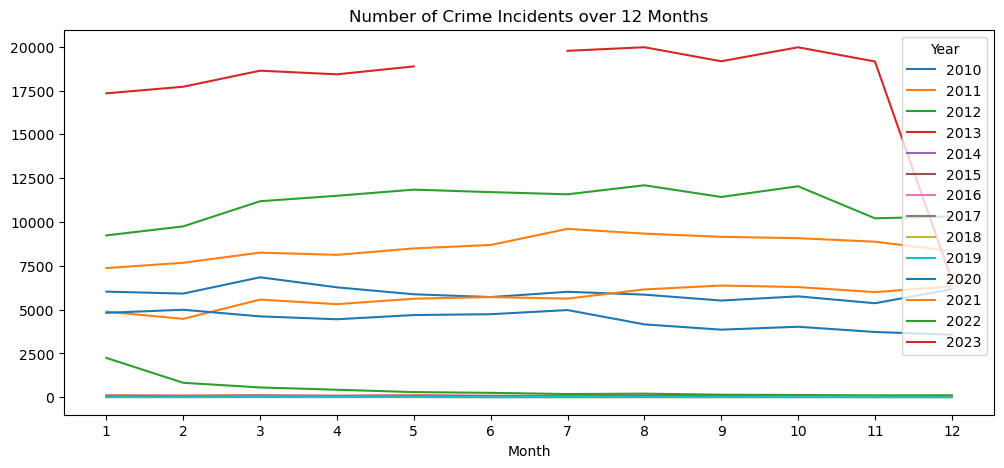

In [128]:
pltdata = df.groupby(['Month', 'Year'])['Day'].count().unstack()
pltdata.plot(kind='line', figsize=(12, 5), xticks=range(1, 13), title='Number of Crime Incidents over 12 Months')

In [ ]:
# Is there a pattern in the amount of criminal acts that occur during an hour? Yes.

# Midday is when there are the most criminal events (lunchtime). Dinnertime is when the second peak occurs.

<Axes: xlabel='Hour'>

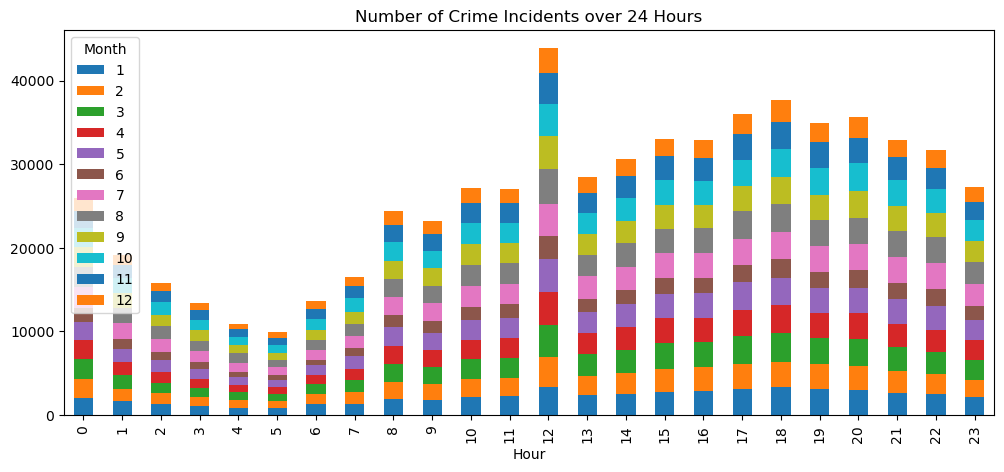

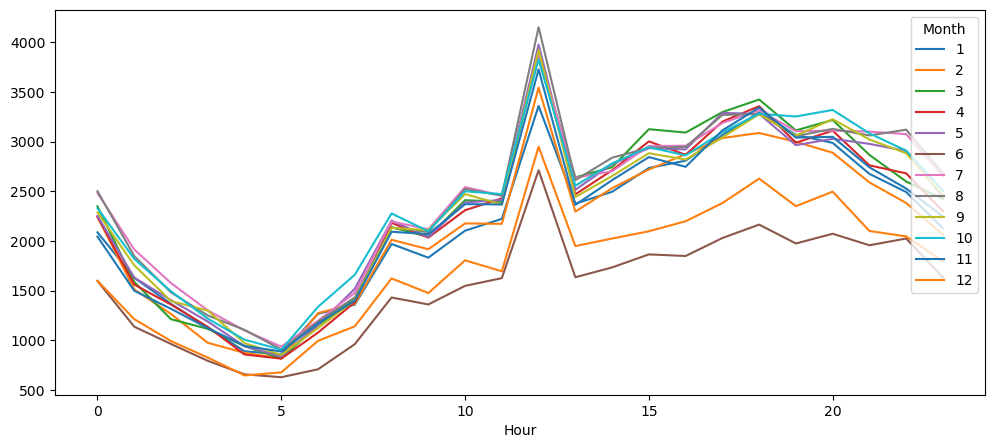

In [129]:
df.groupby(['Hour', 'Month'])['Day'].count().unstack().plot(kind='bar', figsize=(12, 5), stacked=True)
plt.title('Number of Crime Incidents over 24 Hours')
df.groupby(['Hour', 'Month'])['Day'].count().unstack().plot(kind='line', figsize=(12, 5))

In [ ]:
# Is there anything special about each region? 

  #  Area 1 has a particularly high number of crime incidents compared to other areas between 18: 00 and 20:00.
 

In [130]:
top5areas = df.groupby(['AREA'])['Day'].count().sort_values(ascending=False).index[:5]
top5areas

Index([1, 3, 6, 2, 12], dtype='int64', name='AREA')

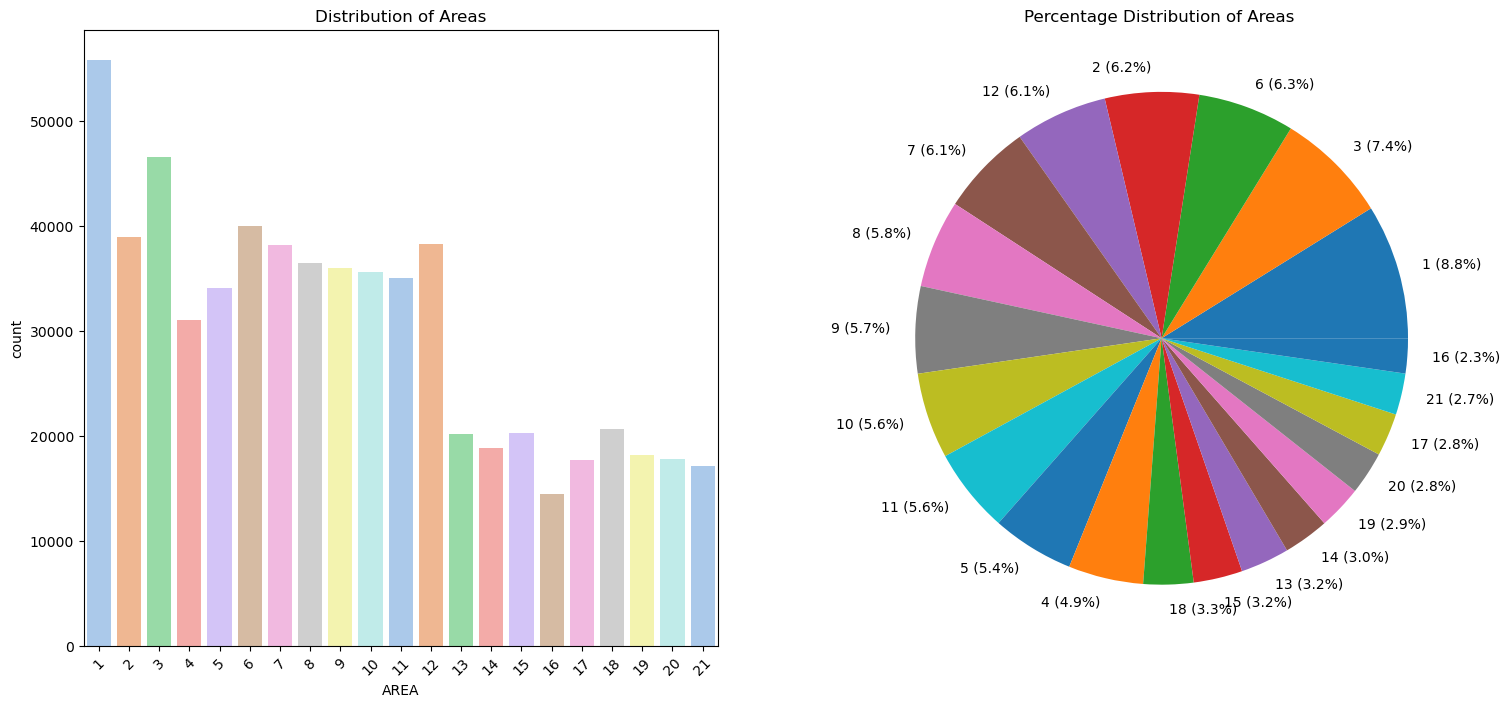

In [131]:
fig, ax = plt.subplots(1, 2, figsize = (18, 8))
sns.countplot(data=df, x='AREA', ax=ax[0])


# Countplot for Year 
sns.countplot(data=df, x='AREA', ax=ax[0], palette='pastel' )
ax[0].set_title('Distribution of Areas')
ax[0].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability



# Pie chart for Month
month_counts = df['AREA'].value_counts()
percentage_labels = [f"{month} ({percentage:.1f}%)"
                     for month, percentage in zip(month_counts.index, month_counts / month_counts.sum() * 100)]

df['AREA'].value_counts().plot.pie(ax=ax[1], autopct='', labels=percentage_labels)
ax[1].set_title('Percentage Distribution of Areas ')

# Remove default labels inside the pie chart
ax[1].set_ylabel('')


plt.show()

Text(0.5, 1.0, 'Number of Crime Incidents over 24 Hours in Top 5 Geographic Areas')

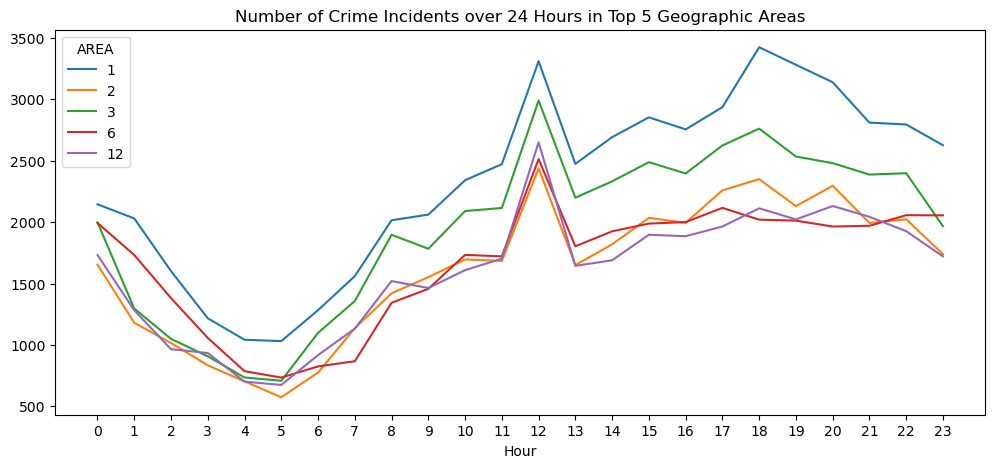

In [132]:
top5areas = df.groupby(['AREA'])['Day'].count().sort_values(ascending=False).index[:5]
data = df[df['AREA'].isin(top5areas)]
data.groupby(['Hour', 'AREA'])['Day'].count().unstack().plot(kind='line', figsize=(12, 5), xticks=range(0, 24))
plt.title('Number of Crime Incidents over 24 Hours in Top 5 Geographic Areas')

In [ ]:
# Analysis of 'Age' : >>

In [ ]:
 # As mentioned earlier, the number of crime incidents againt the 'Adult' (age between 20 and 39) category is the highest. We further show the numbers of the top five descents over ages. There are two exceptional peaks: age 50 for White and age 35 for Unknown. (More explanations are waiting for experts who know more about crimes.)

Text(0.5, 1.0, 'Number of Crime Incidents over Victim Ages')

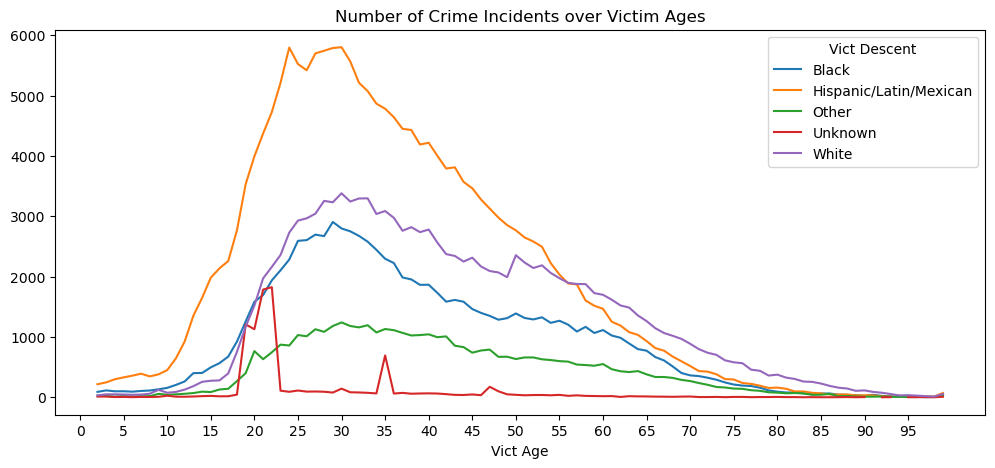

In [133]:
top5descents = df.groupby(['Vict Descent'])['Day'].count().sort_values(ascending=False).index[:5]
data = df[(df['Vict Age']>0) & (df['Vict Descent'].isin(top5descents))].copy()
vddict = {'B':'Black', 'H':'Hispanic/Latin/Mexican', 'O':'Other', 'W':'White', 'X':'Unknown'}
data['Vict Descent'] = data['Vict Descent'].apply(lambda x: vddict[x])

plt_data = data.groupby(['Vict Age', 'Vict Descent'])['Day'].count().unstack()
plt_data.plot(kind='line', figsize=(12, 5), xticks=range(0, 100, 5))
plt.title('Number of Crime Incidents over Victim Ages')

In [ ]:
#There are two observations for the number of different genders at each age: 
   # There is a cutoff at age 35.
   # Below this age, the number of crimes against women is greater than the number of crimes against men.
   # For a man, there are two exceptional peaks: he is at age 35 and she is 50.
   # There is a gender code "H" (82 crimes) that is not listed on the official website.

Text(0.5, 1.0, 'Number of Crime Incidents over Victim Ages')

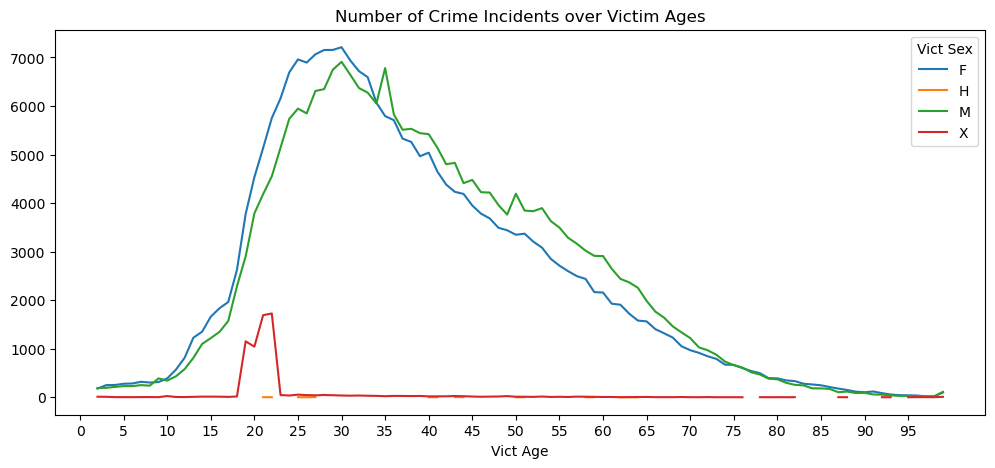

In [134]:
data = df[(df['Vict Age']>0)]
plt_data = data.groupby(['Vict Age', 'Vict Sex'])['Day'].count().unstack()
plt_data.plot(kind='line', figsize=(12, 5), xticks=range(0, 100, 5))
plt.title('Number of Crime Incidents over Victim Ages')

In [ ]:
# By looking at the curves of different areas over time, we found some exceptional peaks in Area 3 (Southwest) and Area 21 (Topanga).

Text(0.5, 1.0, 'Number of Crime Incidents over Victim Ages')

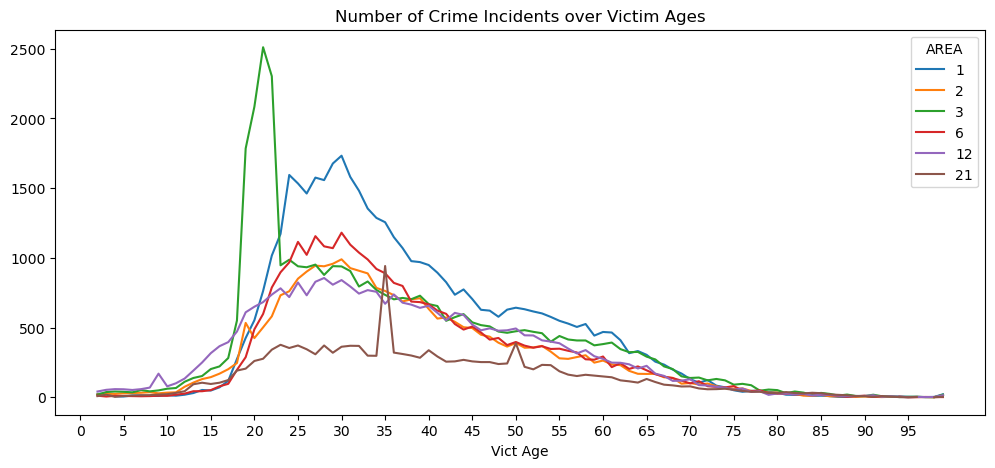

In [135]:
top5areas = list(df.groupby(['AREA'])['Day'].count().sort_values(ascending=False).index[:5])
data = df[(df['Vict Age']>0) & (df['AREA'].isin(top5areas+[21]))]

plt_data = data.groupby(['Vict Age', 'AREA'])['Day'].count().unstack()
plt_data.plot(kind='line', figsize=(12, 5), xticks=range(0, 100, 5))
plt.title('Number of Crime Incidents over Victim Ages')

In [ ]:
#Analysis of 'Geographic Areas' : 

In [ ]:
# The last part shows the number of criminal incidents for 5 major ancestry and 6 age categories in 21 geographical regions.

#Differences in ancestry/age proportions in these areas may depend on many factors, such as population composition and type of local development (business, housing, etc.).

# I'm not familiar with LA, so I'll leave these two numbers up to someone familiar with LA.


Text(0.5, 1.0, 'Number of Crime Incidents over Geographic Areas')

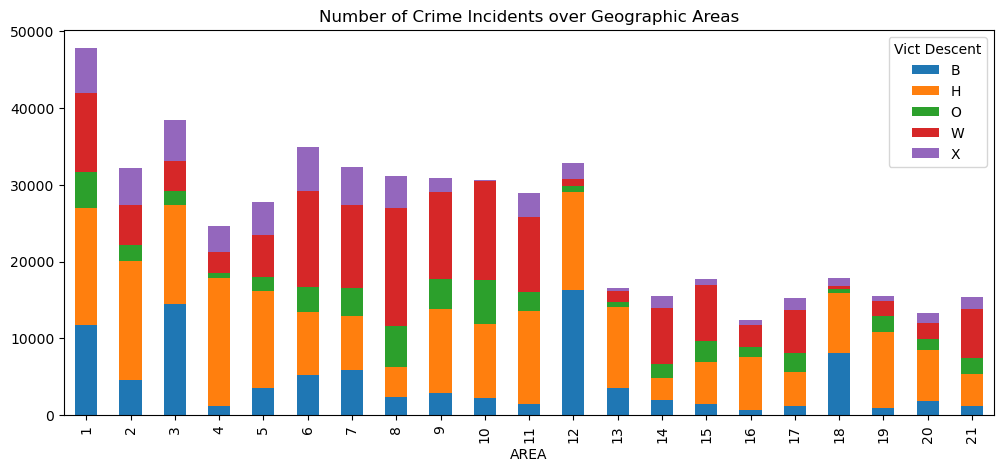

In [136]:
top5descents = df.groupby(['Vict Descent'])['Day'].count().sort_values(ascending=False).index[:5]
data = df[df['Vict Descent'].isin(top5descents)]
plt_data = data.groupby(['AREA', 'Vict Descent'])['Day'].count().unstack()
plt_data.plot(kind='bar', stacked=True, figsize=(12, 5))
#plt_data.plot(kind='line', figsize=(12, 5), xticks=range(1, 22))
plt.title('Number of Crime Incidents over Geographic Areas')

Text(0.5, 1.0, 'Number of Crime Incidents over Geographic Areas')

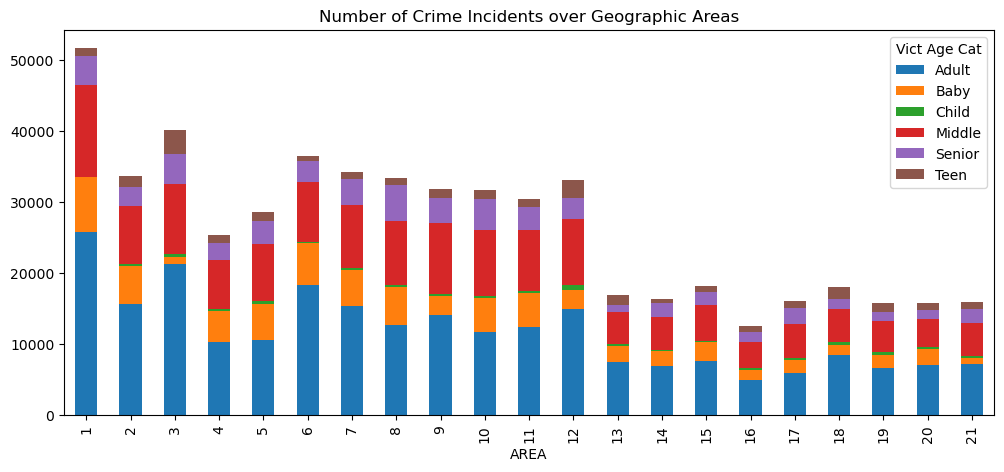

In [137]:
plt_data = df[df['Vict Descent'].notnull()].groupby(['AREA', 'Vict Age Cat'])['Day'].count().unstack()
plt_data.plot(kind='bar', stacked=True, figsize=(12, 5))
#plt_data.plot(kind='line', figsize=(12, 5), xticks=range(1, 22))
plt.title('Number of Crime Incidents over Geographic Areas')